In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [57]:
# dummy data

In [58]:
x,y = datasets.make_blobs(n_samples=200,n_features=2,centers=2,center_box=(0,10))

In [59]:
# x[:10],y[:10]

Need to plot y =0 and y =1 seperately

[first feature when y =0 , 2nd feature when y =0]

[first feature when y =1 , 2nd feature when y =1]

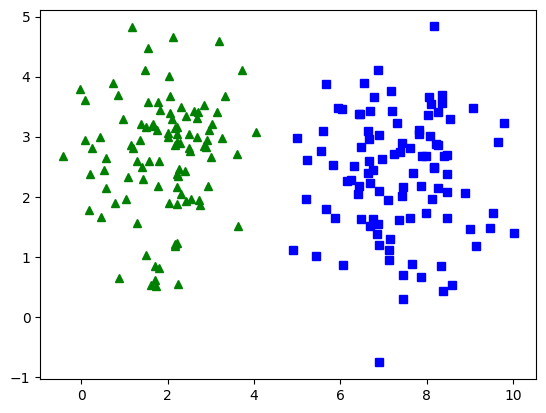

In [60]:
plt.plot(x[:,0][y==0], x[:,1][y==0],"g^")

plt.plot(x[:,0][y==1],x[:,1][y==1],"bs")

plt.show()


Perceptron needs to be updated for every point, for miss-classified point we need to penalize with the sign of y

That's why we need to multiply sign of y

W1 = Wo + x * sign(y)

In [61]:
np.unique(y)

array([0, 1])

Need to change the lable of y==0 to -1 (useful while multiplying the weights)

In [62]:
y[y==0]=-1
np.unique(y)

array([-1,  1])

In [63]:
# we need a line 
# y = slope * x + Y_ intercept
def show(w,w0,x,y):
    slope = -w[0]/ w[1]  # -a/b
    intercept = -w0 / w[1] # -c/b 
    h_x_plane = np.arange(10)
    h_y_plane = slope *h_x_plane + intercept
    plt.plot(h_x_plane,h_y_plane)
    
    plt.plot(x[:,0][y==-1], x[:,1][y==-1],"bs")

    plt.plot(x[:,0][y==1],x[:,1][y==1],"g^")

    plt.show()

    

Perceptron works by updating the line when it find a missclassified point.

### for single point update --->


In [64]:
# def algorithm(x, y, w, w0):
#     for iteration in range(5000):  # many iterations
#         miss_cls = 0
#         for point in range(len(x)): # for each point
#             hs = np.sign(np.dot(w, x[point]) + w0) # half space
#             if hs != np.sign(y[point]):
#                 miss_cls += 1
#                 w += x[point]*np.sign(y[point])  # update equations
#                 w0 += np.sign(y[point])
#                 break # break after first point

#         if miss_cls==0:
#             show(w, w0, x, y)
#             print('N_iter', iteration, '| 98% accuracy!!. Good DB is achieved')
#             break        
        
#         if iteration % 500 == 0:
#             show(w, w0, x, y)
#             print('N_iter', iteration, '| Accuracy:', 1 - round(miss_cls / len(x), 2))
#     return w, w0

Applying the above concept for all the points in the data.

For all the points it is advisible to take the average of all the updation

In [65]:
def algo(x,y,w,w0):
    for iteration in range(5000):
        miss_cls = 0 
        sum_miss_w_vect = 0 # w and w0 vector initialized to zero
        sum_miss_w0 = 0

        for point in range(len(x)):
            hs = np.sign(np.dot(w,x[point])+w0)
            if hs != np.sign(y[point]):
                miss_cls += 1
                sum_miss_w_vect += x[point]*np.sign(y[point])  # w1 = w prev + x * sign(y)
                sum_miss_w0 += np.sign(y[point])  # w0 = w0 prev + 1* sign(y)
                # keep on updating the w & w0 vector for all the miss-classified points

        if ((miss_cls / len(x)) < 0.02):

            show(w,w0,x,y)
            print("No.of iterations",iteration," | 98 '%' accuracy is achived !!!")
            break 
        
        w = w + sum_miss_w_vect / miss_cls # avg =  sum / number
        w0 = w0 + sum_miss_w0 / miss_cls 

        if iteration % 500 == 0 :
            show(w,w0,x,y)
            print("No.of iterations",iteration,"Accuracy =",1 - round(miss_cls/len(x),2))  # accuracy = 1- error

    return w,w0
               
                


Giving initial condition -->>

In [66]:
w = np.random.normal(size=(2,))
w0 = np.random.normal()
print("W -->", w)
print("W0 -->", w0)

W --> [0.12573191 0.9256926 ]
W0 --> 0.8823379205330786


Calling the functions -->>

Intial setting of line and points

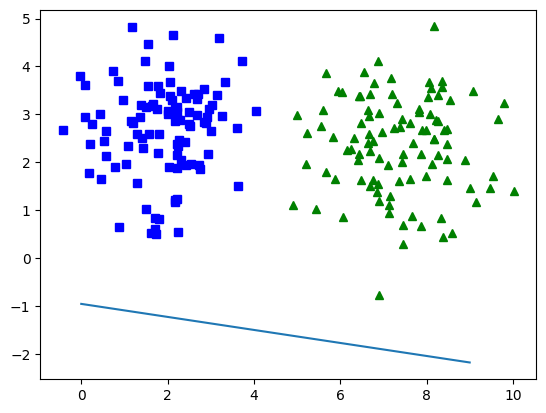

In [67]:
show(w,w0,x,y) 

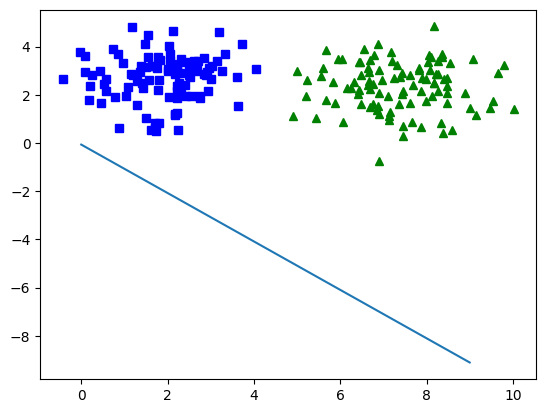

N_iter 0 | Accuracy: 0.5


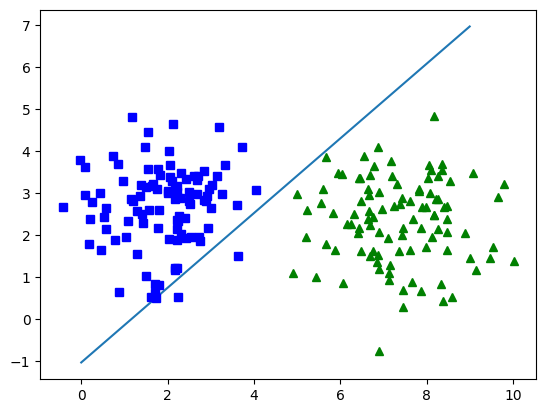

N_iter 25 | 98% accuracy!!. Good DB is achieved


(array([ 7.96154816, -8.9623638 ]), -9.183862545667388)

In [68]:
algorithm(x,y,w,w0)

Info ::

Debugging -->>  Issue :  The line is not getting updated.

When I wrote the code for the first time ,  terminal showed no error 

I re ran the entire document multiple times , after 